In [1]:
import cellmap
import anndata
import scanpy
import matplotlib.pyplot as plt
import numpy as np
import scvelo as scv
import cellmap

2023-07-07 18:13:45.009963: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-07 18:13:45.823513: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 18:13:48.364372: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 18:13:48.383060: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 18:13:56.755891: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

# Create figure data

start RECODE for scRNA-seq data
end RECODE for scRNA-seq
log: {'seq_target': 'RNA', '#significant genes': 10602, '#non-significant genes': 7148, '#silent genes': 10248, 'ell': 100, 'Elapsed time': '0h 0m 56s 469ms'}
Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:09) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:10) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:27) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:01:14) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


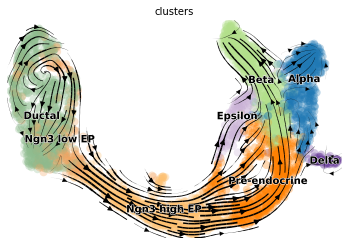

{'Contribution_ratio': {'Potential': '62.66%', 'Rotation': '37.34%'}}


In [2]:
adata = scv.datasets.pancreas()
import screcode
import scanpy
recode = screcode.RECODE()
adata.layers['RECODE'] = recode.fit_transform(adata.X.toarray())
adata.layers['RECODE_log'] = np.log(1e4*adata.layers['RECODE'].T/np.sum(adata.layers['RECODE'],axis=1)+1).T
# scvelo
scanpy.pp.normalize_total(adata, target_sum=1e4)
scanpy.pp.log1p(adata)
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)
scv.tl.velocity(adata,mode='stochastic')
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata)
# cellmap
cellmap.Hodge_decomposition(adata)
adata.write_h5ad('data/pancreas.h5ad')

# Read figure data

In [3]:
adata = anndata.read_h5ad('data/pancreas.h5ad')
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'potential', 'vorticity_umap', 'streamfunc_umap', 'potential_vorticity_umap', 'potential_streamfunc_umap', 'rotation_vorticity_umap', 'rotation_streamfunc_umap', 'rotation'
    var: 'highly_variable_genes', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'CellMap_graph', 'CellMap_log', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'edge_velocity', 'log1p', 'neighbors', 'pca', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'potential_velocity_umap', 'rotation_velocity_umap', 'velocity_umap'
    layers: 'Ms', 'Mu', 'RECODE', 'RECODE_log', 'spliced', 'unspliced', 'variance_velocity', 'velocity'
    obsp: 'connectivities', 'distances'

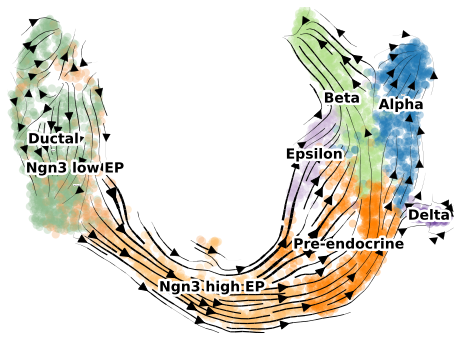

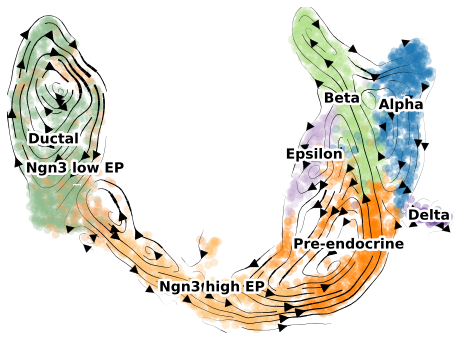

In [4]:
from matplotlib import patheffects as PathEffects
from adjustText import adjust_text

basis='umap'
vkey = 'velocity'
cluster_key = 'clusters'
density = 2
kwargs = {}
potential_vkey = 'potential_velocity'
rotation_vkey = 'rotation_velocity'
alpha = 0.3
legend_fontsize = 14

basis_key = 'X_%s' % basis
data_pos = adata.obsm[basis_key]
cluster = adata.obs[cluster_key]

fig,ax = plt.subplots(1,1,figsize=(8,6))
scv.pl.velocity_embedding_stream(adata,basis=basis,vkey=vkey, title='',ax=ax,color=cluster_key,
                                 show=False,density=density,alpha=alpha,fontsize=18,legend_fontsize=0, legend_loc=None,arrow_size=2,linewidth=2,**kwargs)
texts = []
for c in np.unique(cluster):
    txt = plt.text(np.mean(data_pos[cluster == c],axis=0)[0],np.mean(data_pos[cluster == c],axis=0)[1],c,fontsize=legend_fontsize,ha='center', va='center',fontweight='bold',zorder=20)
    txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
    texts.append(txt)
# adjust_text(texts)
fig.savefig('materials/Fig_endo_1_RNA_velocity.png', bbox_inches='tight',dpi=200)
fig,ax = plt.subplots(1,1,figsize=(8,6))
scv.pl.velocity_embedding_stream(adata,basis=basis,vkey=potential_vkey, title='',ax=ax,color=cluster_key,
                                 show=False,density=density,alpha=alpha,fontsize=18,legend_fontsize=0, legend_loc=None,arrow_size=2,linewidth=2,**kwargs)
texts = []
for c in np.unique(cluster):
    txt = plt.text(np.mean(data_pos[cluster == c],axis=0)[0],np.mean(data_pos[cluster == c],axis=0)[1],c,fontsize=legend_fontsize,ha='center', va='center',fontweight='bold',zorder=20)
    txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
    texts.append(txt)
# adjust_text(texts)
fig.savefig('materials/Fig_endo_2_Potential_flow.png', bbox_inches='tight',dpi=200)
fig,ax = plt.subplots(1,1,figsize=(8,6))
scv.pl.velocity_embedding_stream(adata,basis=basis,vkey=rotation_vkey, title='',ax=ax,color=cluster_key,
                                 show=False,density=density,alpha=alpha,fontsize=18,legend_fontsize=0, legend_loc=None,arrow_size=2,linewidth=2,**kwargs)
texts = []
for c in np.unique(cluster):
    txt = plt.text(np.mean(data_pos[cluster == c],axis=0)[0],np.mean(data_pos[cluster == c],axis=0)[1],c,fontsize=legend_fontsize,ha='center', va='center',fontweight='bold',zorder=20)
    txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
    texts.append(txt)
# adjust_text(texts)
fig.savefig('materials/Fig_endo_3_Rotational_flow.png', bbox_inches='tight',dpi=200)

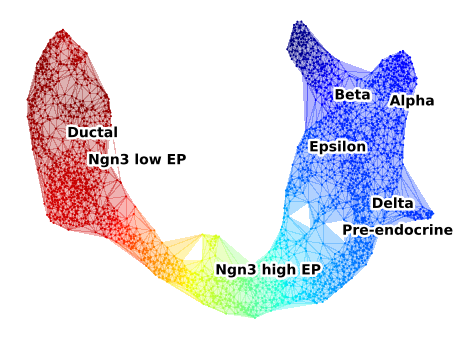

In [5]:
potential_key = 'potential'
graph_key = 'CM_graph'
show_graph = True
cutedge_vol  = None
cutedge_length = None
title = ''
save = False
filename = 'CellMap_view'
show_graph = True
alpha = 0.3
legend_fontsize = 14
kwargs = {'cmap':'jet'}

basis_key = 'X_%s' % basis
data_pos = adata.obsm[basis_key]
fig,ax = plt.subplots(figsize=(8,6))
sc = ax.scatter(data_pos[:,0],data_pos[:,1],c=adata.obs[potential_key],zorder=10,cmap='jet',s=1)
if show_graph:
    tri_ = cellmap.create_graph(data_pos,cutedge_vol=cutedge_vol,cutedge_length=cutedge_length,return_type = 'triangles')[0]
    ax.tripcolor(tri_,adata.obs[potential_key],lw=0.5,zorder=0,alpha=0.3,cmap='jet')
texts = []
cluster = adata.obs[cluster_key]
for c in np.unique(cluster):
    txt = plt.text(np.mean(data_pos[cluster == c],axis=0)[0],np.mean(data_pos[cluster == c],axis=0)[1],c,fontsize=legend_fontsize,ha='center', va='center',fontweight='bold',zorder=20)
    txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
    texts.append(txt)
ax.axis('off')
adjust_text(texts)
ax.set_title(title,fontsize=18)
# plt.colorbar(sc,aspect=20, pad=0.01, orientation='vertical')
fig.savefig('materials/Fig_endo_4_Potential.png', bbox_inches='tight',dpi=200)

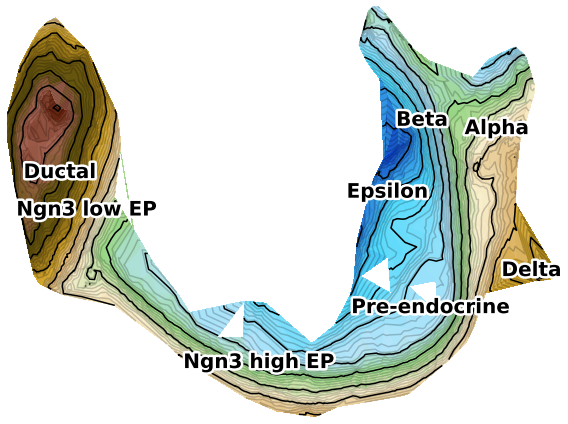

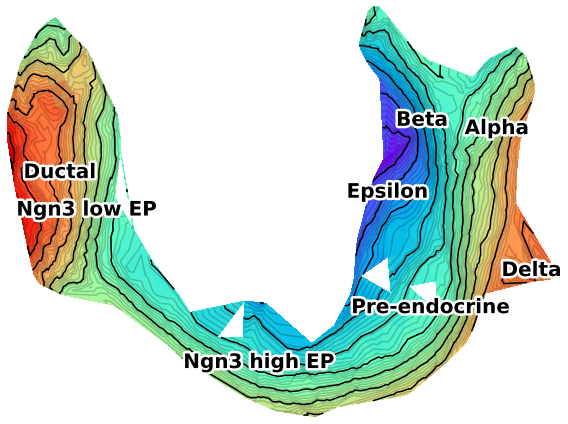

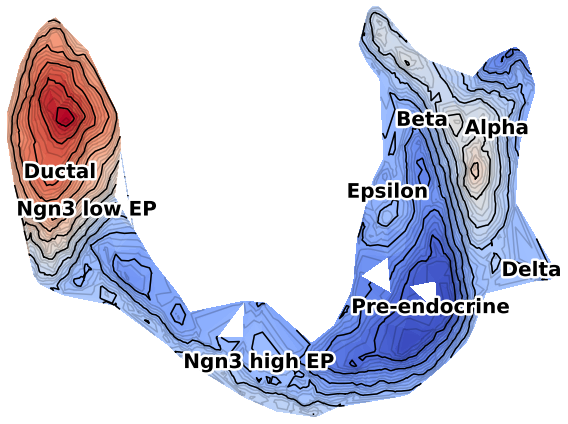

In [6]:
contour_key = 'streamfunc'
graph_key = 'CM_graph'
potential_key = 'potential'
rotation_key = 'rotation'
cutedge_vol  = None
cutedge_length = None
title = ''
save = False
filename = 'CellMap_stream_line'
figsize = (8,6)
fontsize = 14
cbar = False

basis_key = 'X_%s' % basis

key_ = '%s_%s' % (contour_key,basis)
pot_key_ = '%s_%s_%s' % (potential_key,contour_key,basis)
rot_key_ = '%s_%s_%s' % (rotation_key,contour_key,basis)


data_pos = adata.obsm[basis_key]
tri_ = cellmap.create_graph(data_pos,cutedge_vol=cutedge_vol,cutedge_length=cutedge_length,return_type = 'triangles')[0]
cluster = adata.obs[cluster_key]

contour_keys = [key_, pot_key_, rot_key_]
camps = [cellmap.cmap_earth(adata.obs[key_]),'rainbow','coolwarm']
titles = ['RNA velocity','Potential flow','Rotational flow']
filenames = ['Fig_endo_5_RNA_velocity_SL','Fig_endo_6_Potential_flow_SL','Fig_endo_7_Rotational_flow_SL']

for i in range(3):
    fig,ax = plt.subplots(1,1,figsize=figsize,tight_layout=True)
    ax.axis('off')
    ax.set_title(title,fontsize=18)
    sc = ax.tripcolor(tri_,adata.obs[contour_keys[i]],cmap=camps[i])
    ax.tricontour(tri_,adata.obs[contour_keys[i]],lw=0.2,alpha=0.2,levels=75,zorder=3,colors='k',cmap=None,ls='-')
    ax.tricontour(tri_,adata.obs[contour_keys[i]],lw=1,alpha=1,levels=15,zorder=3,colors='k',cmap=None,ls='-')
    if cbar: plt.colorbar(sc,aspect=20, pad=0.01, orientation='vertical').set_label(contour_key,fontsize=20)
    # ax.set_title(titles[i],fontsize=fontsize)
    if cluster_key != None:
        if cluster_key in adata.obs.keys():
            cluster = adata.obs[cluster_key]
            for c in np.unique(cluster):
                txt = ax.text(np.mean(data_pos[cluster == c],axis=0)[0],np.mean(data_pos[cluster == c],axis=0)[1],c,fontsize=20,ha='center', va='center',fontweight='bold',zorder=20)
                txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
    else:
        print('There is no cluster key \"%s\" in adata.obs' % cluster_key)

    # if save: fig.savefig(filename+'.png', bbox_inches='tight')
    fig.savefig('materials/'+filenames[i]+'.png', bbox_inches='tight',dpi=200)

In [7]:
import plotly.graph_objects as go
from plotly.offline import plot
import plotly.io as pio

potential_key = 'potential'
cluster_key ='clusters'
cutedge_vol  = None
cutedge_length = None
show_cells = False
show_shadow = True
shadow_alpha = 0.2
title = 'Landscape'
bgcolor = "white"
gridcolor = "gray"
edges_color='lightgray'
seed = None
n_points = 500
save = False
filename = 'CellMap_view_3D'
kwargs = {}
kwargs['cmap'] = cellmap.cmap_earth(adata.obs[potential_key])

x,y,z = adata.obsm[basis_key][:,0], adata.obsm[basis_key][:,1],adata.obs[potential_key]

c_list  = ['#0938BF','#50D9FB','#B7E5FA','#98D685','#F9EFCD','#E0BB7D','#D3A62D','#997618','#705B10','#5F510D','#A56453','#5C1D09']
c_level = [0,5,20,40,60,75,80,85,90,95,99,100]
custom_cmap = [[0.01*c_level[i],c_list[i]] for i in range(len(c_list))]

tri_,idx_tri = cellmap.create_graph(adata.obsm[basis_key],cutedge_vol=cutedge_vol,cutedge_length=cutedge_length,return_type = 'triangles',cut_std = 1.0)
triangles = tri_.triangles[idx_tri]
print(triangles.shape)

camera = dict(eye=dict(x=1.2, y=-1.2, z=1.0))
idx = np.zeros(adata.shape[0],dtype=bool)
np.random.seed(seed)
idx[np.random.choice(adata.shape[0],min(n_points,adata.shape[0]),replace=False)] = True
shift = 0.01*(max(z)-min(z))
shadow = go.Mesh3d(
    x=x,
    y=y,
    z=np.zeros(adata.shape[0]),
    i=triangles[:, 0],
    j=triangles[:, 1],
    k=triangles[:, 2],
    opacity=shadow_alpha,
    color='black',
)

if cluster_key in adata.obs.keys():
    clstr = adata.obs[cluster_key]
    clstr_set = np.unique(clstr)
    clstr_id = np.empty(adata.shape[0],dtype=int)
    text = np.array([clstr[i]+'<br>Potential: '+str(np.round(z[i],decimals=2)) for i in range(adata.shape[0])])
    for i in range(len(clstr_set)):
        clstr_id[clstr == clstr_set[i]] = i
    cmap = plt.get_cmap('tab10')
    norm = plt.Normalize(vmin=0,vmax=10)
    color_mapped = cmap(norm(clstr_id[idx]))
    cells = go.Scatter3d(
        x=x[idx],
        y=y[idx],
        z=z[idx]+shift,
        mode='markers',
        marker=dict(
            size=2.5,
            color=color_mapped,
            opacity=1
        ),
        text=text[idx],
        hovertemplate='X: %{x:.2f}<br>Y: %{y:.2f}<br>Z: %{z:.2f}<br>%{text}'
    )

    surf = go.Mesh3d(
        x=x,
        y=y,
        z=z,
        i=triangles[:, 0],
        j=triangles[:, 1],
        k=triangles[:, 2],
        intensity=z,
        colorscale=custom_cmap,
        text=text,
        opacity=1,
        hovertemplate='X: %{x:.2f}<br>Y: %{y:.2f}<br>Z: %{z:.2f}<br>%{text}'
    )

    annotations = [dict(
        showarrow=False,
        x=np.percentile(x[clstr == np.unique(clstr)[i]],50),
        y=np.percentile(y[clstr == np.unique(clstr)[i]],50),
        z=np.percentile(z[clstr == np.unique(clstr)[i]],50),
        text="<b>%s<b>" % str(np.unique(clstr)[i]),
        font=dict(size=14,color='rgba(0,0,0,1)'),bgcolor="rgba(255,255,255,0.7)") for i in range(len(np.unique(clstr)))]
    layout = go.Layout(
        title = title,
        width=1500,
        height=1000,
        # margin=dict(l=0,r=0, b=0,t=50),
        scene_camera=camera,
        scene=dict(annotations=annotations,xaxis_title=basis+"_1",yaxis_title=basis+"_2",zaxis_title=potential_key,
                 xaxis = dict(backgroundcolor=bgcolor,gridcolor=gridcolor),
                 yaxis = dict(backgroundcolor=bgcolor,gridcolor=gridcolor),
                 zaxis = dict(backgroundcolor=bgcolor,gridcolor=gridcolor),
        ),
        meta=dict(),
        scene_aspectratio=dict(x=1.0, y=1.0, z=0.5),
    )
    data = [surf]
    if show_cells: data.append(cells)
    if show_shadow: data.append(shadow)
    fig = go.Figure(data=data, layout=layout)
    #                  )
else:
    cells = go.Scatter3d(
        x=x[idx],
        y=y[idx],
        z=z[idx]+shift,
        mode='markers',
        marker=dict(
            size=2,
            color='gray',
        ),
    )
    surf = go.Mesh3d(
        x=x,
        y=y,
        z=z,
        i=triangles[:, 0],
        j=triangles[:, 1],
        k=triangles[:, 2],
        intensity=z,
        colorscale=custom_cmap,
        opacity=1
    )

    layout = go.Layout(
        title = title,
        width=1500,
        height=1000,
        # margin=dict(l=0,r=0, b=0,t=50),
        scene_camera=camera,
        scene=dict(xaxis_title=basis+"_1",yaxis_title=basis+"_2",zaxis_title=potential_key,
                 xaxis = dict(backgroundcolor=bgcolor,gridcolor=gridcolor),
                 yaxis = dict(backgroundcolor=bgcolor,gridcolor=gridcolor),
                 zaxis = dict(backgroundcolor=bgcolor,gridcolor=gridcolor),
        ),
        meta=dict(),
        scene_aspectratio=dict(x=1.0, y=1.0, z=0.5),
    )
    data = [surf]
    if show_cells: data.append(cells)
    if show_shadow: data.append(shadow)
    fig = go.Figure(data=data, layout=layout)
fig.update_layout(coloraxis_showscale=False,margin=dict(l=0,r=0, b=0,t=50))
fig.show()



pio.write_image(fig, 'materials/Fig_endo_08_Potential3D.png')


(7294, 3)


/home/yusukeimoto/.local/lib/python3.10/site-packages/kaleido/scopes/base.py:188: DeprecationWarning:

setDaemon() is deprecated, set the daemon attribute instead



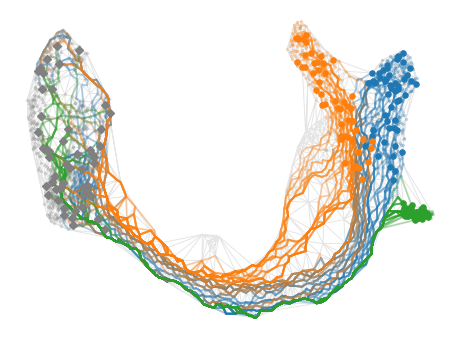

In [8]:
import networkx as nx

path_key = 'path'
streamfunc_key = 'streamfunc'
source_cluster = 'Ductal'
target_clusters = ['Alpha','Beta','Delta']
register = 1
n_cells = 50
graph_method = 'Delauney'
cutedge_vol  = None
cutedge_length = None

basis_key = 'X_%s' % basis
pot_sl_key_ = '%s_%s_%s' % (potential_key,streamfunc_key,basis)

data_pos = adata.obsm[basis_key]
streamfunc_ = adata.obs[pot_sl_key_]

## Compute graph and edge velocities
tri_ = cellmap.create_graph(data_pos,cutedge_vol=cutedge_vol,cutedge_length=cutedge_length,return_type='triangles')[0]
source, target = cellmap.create_graph(data_pos,cutedge_vol=cutedge_vol,cutedge_length=cutedge_length,return_type='edges')

# def cost(data_pos,s,t,g,trg_,reg):
#     return np.exp(-g*reg)*np.linalg.norm(data_pos[s]-data_pos[t])*np.exp(np.linalg.norm(data_pos[s]-data_pos[t])/dis_mean)

G = nx.DiGraph()
G.add_weighted_edges_from([(int(s),int(t),1) for s,t in np.vstack((source,target)).T])
G.add_weighted_edges_from([(int(t),int(s),-1) for s,t in np.vstack((source,target)).T])
edges_ = np.array(list(G.edges))
weights_ = np.array([G[u][v]['weight'] for u, v in edges_])

dis_mean = np.mean(np.linalg.norm(data_pos[source]-data_pos[target],axis=1))
cmap_ = plt.get_cmap("tab10")
fig,ax = plt.subplots(figsize=figsize)
ax.triplot(tri_,color='gray',zorder=0,alpha=0.2,lw=1)
clusters_ = adata.obs[cluster_key]
idx_ = clusters_ == source_cluster
ax.scatter(data_pos[idx_,0],data_pos[idx_,1],color='gray',zorder=10,marker='D',alpha=0.2,s=5,label=source_cluster+' (source)')
for i_trg_ in range(len(target_clusters)):
    idx_ = clusters_ == target_clusters[i_trg_]
    ax.scatter(data_pos[idx_,0],data_pos[idx_,1],color=cmap_(i_trg_),zorder=10,marker='o',alpha=0.2,s=5,label=target_clusters[i_trg_]+' (target)')
# leg = ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, fontsize=12,markerscale=3)
# for lh in leg.legend_handles: lh.set_alpha(1)

data_src_ = data_pos[adata.obs[cluster_key].values == source_cluster]
center_src_ = np.mean(data_src_,axis=0)
centrality_src_ = np.linalg.norm(data_src_-center_src_,axis=1)
src_set_all_ = np.arange(adata.shape[0])[adata.obs[cluster_key].values == source_cluster][np.argsort(centrality_src_)]
n_src_ = sum(adata.obs[cluster_key].values == source_cluster)
path_all = {}
for i_trg_ in range(len(target_clusters)):
    target_cluster = target_clusters[i_trg_]
    n_cells_ = np.min([n_cells,sum(adata.obs[cluster_key].values == source_cluster),sum(adata.obs[cluster_key].values == target_cluster)])
    data_trg_ = data_pos[adata.obs[cluster_key].values == target_cluster]
    center_trg_ = np.mean(data_trg_,axis=0)
    centrality_trg_ = np.linalg.norm(data_trg_-center_trg_,axis=1)
    n_trg_ = sum(adata.obs[cluster_key].values == target_cluster)
    idx_trg_ = np.arange(0,n_trg_,int(n_trg_/n_cells_))[:n_cells_]
    trg_set_ = np.arange(adata.shape[0])[adata.obs[cluster_key].values == target_cluster][np.argsort(centrality_trg_)][idx_trg_]
    # idx_src_= np.array([np.argmin(np.abs(streamfunc_[trg__] - streamfunc_[src_set_all_].values)) for trg__ in trg_set_])
    idx_src_ = np.arange(0,n_src_,int(n_src_/n_cells_))[:n_cells_]
    src_set_ = src_set_all_[idx_src_]

    pathes,edges,weights,dists  = [],[],[],[]
    for src_,trg_ in np.vstack((src_set_,trg_set_)).T:
        weights_i_ = np.exp(-weights_*(adata.obs[potential_key][edges_[:,0]].values - adata.obs[potential_key][edges_[:,1]].values)*register)*np.abs(streamfunc_[trg_]-streamfunc_[edges_[:,1]])*np.exp(np.linalg.norm(data_pos[edges_[:,0]]-data_pos[edges_[:,1]],axis=1)/dis_mean)
        nx.set_edge_attributes(G, values=dict(zip(G.edges(), weights_i_)), name='weight')
        path = nx.dijkstra_path(G, source=src_, target=trg_, weight='weight')
        pathes.append(path)
        edges.append(np.array([[path[i], path[i+1]] for i in range(len(path)-1)]))
        weights.append((sum([G[path[i]][path[i+1]]['weight'] for i in range(len(path)-1)]))/sum([np.linalg.norm(data_pos[path[i]]-data_pos[path[i+1]]) for i in range(len(path)-1)]))
        dists.append(sum([np.linalg.norm(data_pos[path[i]]-data_pos[path[i+1]]) for i in range(len(path)-1)]))
    path_all[source_cluster+'_'+target_clusters[i_trg_]] = pathes
    ax.scatter(data_pos[trg_set_,0],data_pos[trg_set_,1],color=cmap_(i_trg_),zorder=20,marker='o',s=30)
    ax.scatter(data_pos[src_set_,0],data_pos[src_set_,1],color='gray',zorder=20,marker='D',s=30)
    for i in range(n_cells_):
        ax.plot(data_pos[pathes[i],0],data_pos[pathes[i],1],color=cmap_(i_trg_),zorder=10,ls='-',lw=2,alpha=0.3)
ax.axis('off')
adata.uns[path_key] = path_all
fig.savefig('materials/Fig_endo_09_Trajectory.png', bbox_inches='tight',dpi=200)

In [9]:
# cellmap.gene_dynamics(adata,source_cluster,target_clusters)
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

path_key = 'path'
exp_key = None
gene_dynamics_key = 'gene_dynamics'
n_div = 100
n_poly = 10

if exp_key == None:
    if scipy.sparse.issparse(adata.X): data_exp = adata.X.toarray()
    else: data_exp = adata.X
else:
    data_exp = adata.layers[exp_key]
path = adata.uns[path_key]
gene_dynamics_ = {}
for i in range(len(path)):
    name_ = source_cluster+'_'+target_clusters[i]
    x_data,y_data = np.empty(0,dtype=float),np.empty([0,adata.shape[1]],dtype=float)
    for pi in path[name_]:
        x_data = np.append(x_data,np.linspace(0,1,len(pi)))
        y_data = np.vstack((y_data,data_exp[pi]))

    X = x_data[:, np.newaxis]
    poly = PolynomialFeatures(degree=10)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y_data)
    plot_x = np.linspace(0,1,n_div+1)
    gene_dynamics_[source_cluster+'_'+target_clusters[i]] = model.predict(poly.fit_transform(plot_x[:, np.newaxis]))
adata.uns[gene_dynamics_key] = gene_dynamics_
print('Done the computation of gene dynamics')



Done the computation of gene dynamics


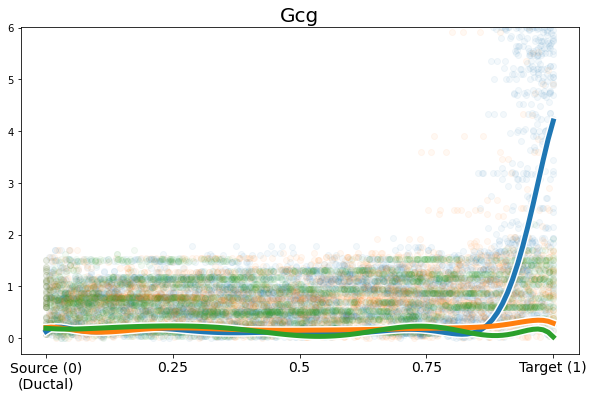

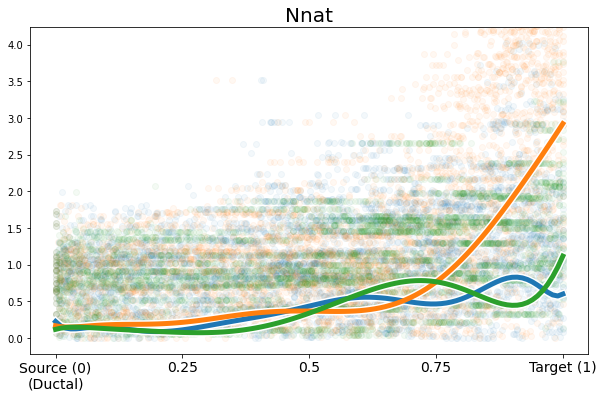

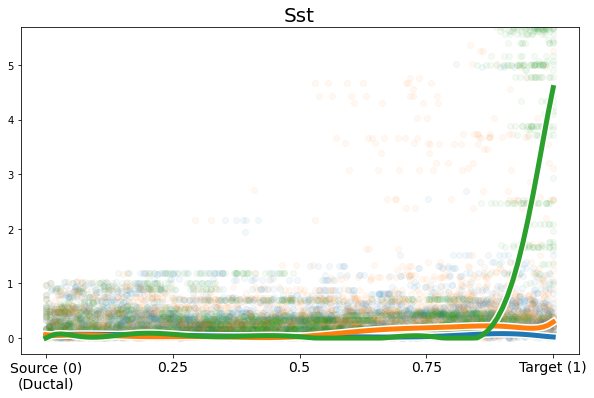

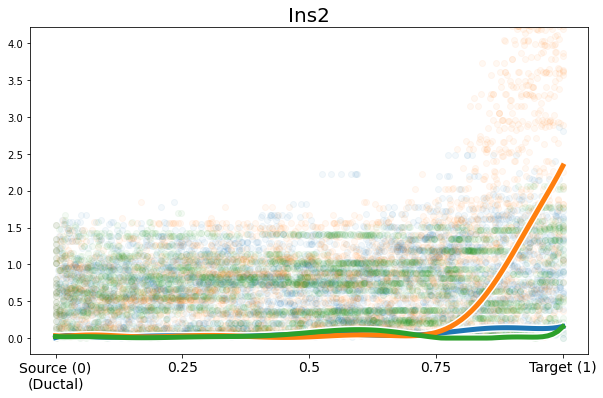

In [10]:
# cellmap.gene_dynamics_plot
genes = ['Gcg','Nnat','Sst','Ins2']
%matplotlib inline

path_key = 'path'
exp_key ='RECODE_log'
gene_dynamics_key = 'gene_dynamics'
fontsize_title = 20
fontsize_label = 14
fontsize_legend = 12
save = True
save_dir = 'materials/Fig_endo_10_Gene_dynamics/'
save_filename = 'Fig_endo_10_Gene_dynamics_plot'

if exp_key == None:
    if scipy.sparse.issparse(adata.X): data_exp = adata.X.toarray()
    else: data_exp = adata.X
else:
    data_exp = adata.layers[exp_key]
path = adata.uns[path_key]
cmap_ = plt.get_cmap("tab10")

for gene in genes:
    if gene in adata.var.index:
        fig = plt.figure(figsize=(10,6))
        y_data_all = []
        for i in range(len(target_clusters)):
            name_ = source_cluster+'_'+target_clusters[i]
            x_data,y_data = np.empty(0,dtype=float),np.empty(0,dtype=float)
            for pi in path[name_]:
                y_ = data_exp[:,adata.var.index==gene][pi].T[0]
                idx_ = y_>0
                x_data = np.append(x_data,np.linspace(0,1,len(pi))[idx_])
                y_data = np.append(y_data,y_[idx_])
            if len(y_data):
                plt.scatter(x_data, y_data,color=cmap_(i),alpha=0.05,zorder=0)
            dynamics_ = adata.uns[gene_dynamics_key][name_][:,adata.var.index==gene]
            plot_x = np.linspace(0,1,len(dynamics_))
            dynamics_[dynamics_ < 0] = 0
            plt.plot(plot_x, dynamics_,color='w',lw=8,zorder=1)
            plt.plot(plot_x, dynamics_,color=cmap_(i),lw=5,label=target_clusters[i],zorder=2)
            y_data_all = np.append(y_data_all,y_data)
        y_top_ = np.percentile(y_data_all,99)
        plt.ylim([-0.05*y_top_,y_top_])
        # plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0,title='Target', fontsize=fontsize_legend, title_fontsize=fontsize_legend)
        plt.xticks([0,0.25,0.5,0.75,1],['Source (0)\n(%s)' % source_cluster,'0.25','0.5','0.75','Target (1)'],fontsize=fontsize_label)
        plt.title(gene,fontsize=fontsize_title)
        plt.show()
        if save:
            filename = '%s_%s' % (save_filename,gene) if save_dir == None else '%s/%s_%s' % (save_dir,save_filename,gene)
            fig.savefig(filename+'.png', bbox_inches='tight')
        plt.close()
    else:
        print('Gene \"%s\" was not found' % gene)

In [11]:
import sklearn.decomposition
# culc_bifurcation_diagram
path_key = 'path'
exp_key = None
gene_dynamics_key = 'gene_dynamics'
bifurcation_diagram_key = 'bifurcation_diagram'
n_div = 100
PC = 1

name_i_ = source_cluster + '_' + target_clusters[0]
samples_ = np.empty([len(target_clusters),adata.uns['gene_dynamics'][name_i_].shape[0],adata.uns['gene_dynamics'][name_i_].shape[1]],dtype=float)
for i in range(len(target_clusters)):
    name_i_ = source_cluster + '_' + target_clusters[i]
    samples_[i] = adata.uns['gene_dynamics'][name_i_]
pca_ = sklearn.decomposition.PCA().fit(samples_[:,-1])
samples_pca_ = pca_.transform(np.concatenate(samples_))

bd_ = {}
for i in range(len(target_clusters)):
    name_i_ = source_cluster + '_' + target_clusters[i]
    bd_[name_i_] = samples_pca_[i*(n_div+1):(i+1)*(n_div+1),PC-1]

adata.uns[bifurcation_diagram_key] = bd_

In [12]:
#bifurcation_diagram
path_key = 'path'
exp_key = None
gene_dynamics_key = 'gene_dynamics'
bifurcation_diagram_key = 'bifurcation_diagram'
n_div = 100
fontsize_label = 14
adjusttext =False
PC = 1
save = True
save_dir = 'materials'
save_filename = 'Fig_endo_11_Bifurcation_diagram'



vlines = [0,0.2,0.4,0.6,0.8,1]
vline_labels = np.append(np.append('Source (0)',np.array(vlines)[1:-1]),'Target (1)')

fig,ax = plt.subplots(figsize=(15,3))
name_i_ = source_cluster + '_' + target_clusters[0]
ax.text(0,adata.uns[bifurcation_diagram_key][name_i_][0],source_cluster+' ',fontsize=fontsize_label,va='center',ha='right')
texts = []
for i in range(len(target_clusters)):
    name_i_ = source_cluster + '_' + target_clusters[i]
    y_ = adata.uns[bifurcation_diagram_key][name_i_]
    ax.plot(np.linspace(0,1,n_div+1),y_,lw=5,zorder=2)
    texts = np.append(texts,ax.text(1,y_[-1],' '+target_clusters[i],fontsize=fontsize_label,va='center',ha='left'))
for vl in vlines:
    ax.axvline(vl,color='k',ls='--',lw=1,zorder=0)
ax.tick_params(axis='x', which='both', top=True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.yaxis.set_visible(False)
ax.set_xticks(vlines)
ax.set_xticklabels(vline_labels,fontsize=fontsize_label)
filename = '%s' % (save_filename) if save_dir == None else '%s/%s' % (save_dir,save_filename)
fig.savefig(filename+'.png', bbox_inches='tight')

In [13]:
import umap
import sklearn.mixture

n_div = 100
n_neighbors = 15
min_dist = 0.3
seed = 0
gene_dynamics_key = 'gene_dynamics'
gene_atlas_key = 'gene_atlas'
threshold_min = 1
n_clusters = 20
n_components = 2
pt_size = 5

gene_dynamics_ = adata.uns[gene_dynamics_key]
gene_dynamics_all_ = np.empty([0,n_div+1],dtype=float)
gene_dynamics_all_norm_ = np.empty([0,n_div+1],dtype=float)
idx_gene_dynamics_ = [0]
for i in range(len(target_clusters)):
    name_i_ = source_cluster + '_' + target_clusters[i]
    max_ = np.max(gene_dynamics_[name_i_],axis=0)
    idx_ = max_ > threshold_min
    adata.var['expressed_'+name_i_] = idx_
    idx_gene_dynamics_ = np.append(idx_gene_dynamics_,idx_gene_dynamics_[i]+sum(idx_))
    gene_dynamics_all_ = np.vstack((gene_dynamics_all_,gene_dynamics_[name_i_][:,idx_].T))
    gene_dynamics_all_norm_ = np.vstack((gene_dynamics_all_norm_,(gene_dynamics_[name_i_][:,idx_]/max_[idx_]).T))


umap_ = umap.UMAP(n_components=n_components,random_state=seed,n_neighbors=n_neighbors,min_dist=min_dist)
gene_dynamics_all_umap_ = umap_.fit_transform(gene_dynamics_all_)

data_ = gene_dynamics_all_umap_
gm = sklearn.mixture.GaussianMixture(n_components=n_clusters,random_state=0).fit(data_)
clusters_tmp_ = gm.predict(data_)
pc1_ = sklearn.decomposition.PCA(n_components=1).fit_transform(data_)[:,0]
pc1_ = np.sign(np.dot(pc1_,gene_dynamics_all_umap_[:,0]))*pc1_
pc1_order_ = np.argsort([np.mean(pc1_[clusters_tmp_==i]) for i in range(n_clusters)])
dict_sort_ = dict(zip(pc1_order_,np.unique(clusters_tmp_)))
clusters_ = np.array([dict_sort_[c] for c in clusters_tmp_])

texts_ = []
index_ = []
s_,e_ = 0,0
for i in range(len(target_clusters)):
    name_i_ = source_cluster + '_' + target_clusters[i]
    idx_ = adata.var['expressed_'+name_i_]
    gene_list_ = adata.var.index[idx_].values
    e_ += sum(idx_)
    txt_ = gene_list_ + '<br>' + target_clusters[i]+'<br>cluster '+ np.array(clusters_[s_:e_]+1,dtype=str)#+ '<br><img src="'+image_+'" width="200">'
    texts_= np.append(texts_,txt_)
    index_ = np.append(index_,source_cluster + '_' + target_clusters[i] + '_' + gene_list_)
    adata.var['clusters_'+name_i_] = -np.ones(adata.shape[1],dtype=int)
    adata.var['clusters_'+name_i_][idx_] = clusters_[s_:e_]
    s_ += sum(idx_)

adata.uns[gene_atlas_key] = {
    'index':index_,
    'texts':texts_,
    'dynamics':gene_dynamics_all_,
    'dynamics_norm':gene_dynamics_all_norm_,
    'gene_atlas':gene_dynamics_all_umap_,
    'clusters': clusters_,
}

In [14]:
import matplotlib

path_key = 'path'
exp_key = None
gene_dynamics_key = 'gene_dynamics'
bifurcation_diagram_key = 'bifurcation_diagram'
target_genes = []
n_div = 100
fontsize_label = 24
fontsize_text = 12
fontsize_nDEG = 18
fontsize_legend = 10
DEG_min = 1.0
DEG_rate = 0.3
max_num_annotations = 10
max_num_legend = 25
save = True
save_dir='materials/Fig_endo_12_DEG_dynamics'
save_filename='Fig_endo_12_DEG_dynamics'
save_type='png'

n_plot_ = int(len(target_clusters)*(len(target_clusters)-1)/2)
cmap_ = plt.get_cmap("tab10")
cmap20_ = plt.get_cmap("tab20")
gene_dynamics_ = adata.uns[gene_dynamics_key]
matplotlib.rcParams['animation.embed_limit'] = 2**128
vlines = [0,0.2,0.4,0.6,0.8,1]
vline_labels = np.append(np.append('Source (0)',np.array(vlines)[1:-1]),'Target (1)')
def update(t,name_i_,name_j_,max_val_,lim,i,j,k):
    print('\rcomputing %s vs %s (%d/%d) %d/%d' % (target_clusters[i],target_clusters[j],k,n_plot_,t+1,n_div+1),end='')
    idx_DEG_i_ = np.arange(adata.shape[1])[(gene_dynamics_[name_j_][t] < gene_dynamics_[name_i_][t] - DEG_rate) & (gene_dynamics_[name_i_][t] > DEG_min)]
    idx_DEG_j_ = np.arange(adata.shape[1])[(gene_dynamics_[name_i_][t] < gene_dynamics_[name_j_][t] - DEG_rate) & (gene_dynamics_[name_j_][t] > DEG_min)]
    idx_DEG_i_ = idx_DEG_i_[np.argsort(gene_dynamics_[name_i_][t][idx_DEG_i_]- DEG_rate - gene_dynamics_[name_j_][t][idx_DEG_i_])[::-1]]
    idx_DEG_j_ = idx_DEG_j_[np.argsort(gene_dynamics_[name_j_][t][idx_DEG_j_]- DEG_rate - gene_dynamics_[name_i_][t][idx_DEG_j_])[::-1]]
    if len(idx_DEG_i_) > max_num_annotations:
        idx_DEG_ann_i_ = idx_DEG_i_[:max_num_annotations]
    else:
        idx_DEG_ann_i_  = idx_DEG_i_
    if len(idx_DEG_j_) > max_num_annotations:
        idx_DEG_ann_j_ = idx_DEG_j_[:max_num_annotations]
    else:
        idx_DEG_ann_j_  = idx_DEG_j_

    if len(idx_DEG_i_) > max_num_legend:
        idx_DEG_leg_i_ = idx_DEG_i_[:max_num_legend]
    else:
        idx_DEG_leg_i_  = idx_DEG_i_
    if len(idx_DEG_j_) > max_num_legend:
        idx_DEG_leg_j_ = idx_DEG_j_[:max_num_legend]
    else:
        idx_DEG_leg_j_  = idx_DEG_j_
    # ax1.cla()
    ax2.cla()
    # ax3.cla()
    name_i__ = source_cluster + '_' + target_clusters[0]
    ax2.scatter(gene_dynamics_[name_i_][t],gene_dynamics_[name_j_][t],s=1,color="gray",zorder=1)
    ax2.scatter(gene_dynamics_[name_i_][t][idx_DEG_i_],gene_dynamics_[name_j_][t][idx_DEG_i_],color=cmap_(i),zorder=2,s=20)
    ax2.scatter(gene_dynamics_[name_i_][t][idx_DEG_j_],gene_dynamics_[name_j_][t][idx_DEG_j_],color=cmap_(j),zorder=2,s=20)
    texts = []
    for g in np.arange(adata.shape[1])[idx_DEG_ann_i_]:
        tx_ = ax2.text(gene_dynamics_[name_i_][t][g],gene_dynamics_[name_j_][t][g],'_'+adata.var.index[g],color="k",zorder=2,fontsize=fontsize_text)
        texts = np.append(texts,tx_)
    for g in np.arange(adata.shape[1])[idx_DEG_ann_j_]:
        tx_ = ax2.text(gene_dynamics_[name_i_][t][g],gene_dynamics_[name_j_][t][g],'_'+adata.var.index[g],color="k",zorder=2,fontsize=fontsize_text)
        texts = np.append(texts,tx_)
    if len(target_genes):
        for gene_ in target_genes:
            idx_gene_ = adata.var.index == gene_
            ax2.scatter(gene_dynamics_[name_i_][t][idx_gene_],gene_dynamics_[name_j_][t][idx_gene_],s=20,color="red",zorder=2)
            tx_ = ax2.text(gene_dynamics_[name_i_][t][idx_gene_],gene_dynamics_[name_j_][t][idx_gene_],'_'+gene_,color="r",zorder=2,fontsize=fontsize_text)
            texts = np.append(texts,tx_)
    # legend_i_ = ''
    # for g in np.arange(adata.shape[1])[idx_DEG_leg_i_]: legend_i_ += '(%.02f, %.02f)  %s\n' % (gene_dynamics_[name_i_][t][g],gene_dynamics_[name_j_][t][g],adata.var.index[g])
    # legend_j_ = ''
    # for g in np.arange(adata.shape[1])[idx_DEG_leg_j_]: legend_j_ += '(%.02f, %.02f)  %s\n' % (gene_dynamics_[name_i_][t][g],gene_dynamics_[name_j_][t][g],adata.var.index[g])
    ax2.text(0.9*(lim[1]-lim[0])+lim[0], 0.1*(lim[1]-lim[0])+lim[0], str(len(idx_DEG_i_)) , ha='center', va='center', fontsize=fontsize_nDEG,color=cmap_(i), fontweight="bold",zorder=3)
    ax2.text(0.1*(lim[1]-lim[0])+lim[0], 0.9*(lim[1]-lim[0])+lim[0], str(len(idx_DEG_j_)) , ha='center', va='center', fontsize=fontsize_nDEG,color=cmap_(j), fontweight="bold",zorder=3)
    ax2.fill_between(lim, lim-DEG_rate, lim+DEG_rate, facecolor='lightgray',  alpha=0.5,zorder=0)
    ax2.fill([-0.01*max_val_, DEG_min, DEG_min, -0.01*max_val_], [-0.01*max_val_, -0.01*max_val_, DEG_min, DEG_min], facecolor='lightgray', alpha=0.5,zorder=0)
    ax2.set_xlabel(target_clusters[i],fontsize=fontsize_label,color=cmap_(i), fontweight="bold")
    ax2.set_ylabel(target_clusters[j],fontsize=fontsize_label,color=cmap_(j), fontweight="bold")
    ax2.set_xlim(lim)
    ax2.set_ylim(lim)
    ax2.grid(ls='--')
    # ax3.text(0.0,1,target_clusters[i], ha='left', va='top', fontsize=fontsize_legend,color=cmap_(i),zorder=3, fontweight="bold")
    # ax3.text(0.0,0.97,legend_i_, ha='left', va='top', fontsize=fontsize_legend,color=cmap_(i),zorder=3)
    # ax3.text(0.5,1,target_clusters[j], ha='left', va='top', fontsize=fontsize_legend,color=cmap_(j),zorder=3, fontweight="bold")
    # ax3.text(0.5,0.97,legend_j_, ha='left', va='top', fontsize=fontsize_legend,color=cmap_(j),zorder=3)
    # ax3.axis('off')

k = 0
for i in range(len(target_clusters)):
    for j in range(i+1,len(target_clusters)):
        name_i_ = source_cluster+'_'+target_clusters[i]
        name_j_ = source_cluster+'_'+target_clusters[j]
        # fig,ax = plt.subplots(1,2,figsize=(14,8),gridspec_kw={'width_ratios': [4,3]},tight_layout=True)
        fig = plt.figure(figsize=(14,10),tight_layout=True)
        grid = plt.GridSpec(10,14)
        ax1 = fig.add_subplot(grid[0:2,0:12])
        ax2 = fig.add_subplot(grid[2:10,0:8])
        ax3 = fig.add_subplot(grid[2:10,8:14])
        max_val_ = max(np.max(gene_dynamics_[name_i_]),np.max(gene_dynamics_[name_j_]))
        lim = np.array([-0.01*max_val_,1.01*max_val_])
        k = k+1
        filename = '%s_%s_%s' % (save_filename,target_clusters[i],target_clusters[j]) if save_dir == None else '%s/%s_%s_%s' % (save_dir,save_filename,target_clusters[i],target_clusters[j])
        matplotlib.use('Agg')
        if save_type == 'image': save_type = 'png'
        print('\nSaving gif animation as %s' % filename)
        for t in range(n_div+1):
            # fig = plt.figure(figsize=(14,10),tight_layout=True)
            # grid = plt.GridSpec(10,14)
            # ax1 = fig.add_subplot(grid[0:2,0:12])
            # ax2 = fig.add_subplot(grid[2:10,0:8])
            # ax3 = fig.add_subplot(grid[2:10,8:14])
            fig,ax2 = plt.subplots(figsize=(8,8),tight_layout=True)
            update(t,name_i_,name_j_,max_val_,lim,i,j,k)
            filename_ = '%s_%03d.%s' % (filename,t,save_type)
            fig.savefig(filename_, bbox_inches='tight')
            plt.close()
        matplotlib.use('TkAgg')


Saving gif animation as materials/Fig_endo_12_DEG_dynamics/Fig_endo_12_DEG_dynamics_Alpha_Beta
computing Alpha vs Beta (1/3) 101/101

ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running

In [ ]:
cellmap.DEG_dynamics(adata,source_cluster,target_clusters)

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio
import random
save = True
save_dir = 'materials'
save_filename = 'Fig_endo_13_Gene_atlas'
save_type = 'png'
normalization = False

target_genes = []#
# target_genes = ['Neurog3','Fev','Arx','Sct','Meis2','Mafb']
pt_size = 5


texts_ = adata.uns[gene_atlas_key]['texts']
if normalization:
    gene_dynamics_all_ = adata.uns[gene_atlas_key]['dynamics_norm']
else:
    gene_dynamics_all_ = adata.uns[gene_atlas_key]['dynamics']
gene_dynamics_all_umap_ = adata.uns[gene_atlas_key]['gene_atlas']
clusters_ = adata.uns[gene_atlas_key]['clusters']
cluster_set_ = np.unique(clusters_)

x_data = gene_dynamics_all_umap_[:,0]
y_data = gene_dynamics_all_umap_[:,1]

color_clusters_ = np.array(['rgb'+str(tuple(int(i*255) for i in plt.get_cmap("tab20")(c%20))) for c in clusters_])
color_celltypes_ = np.empty(len(gene_dynamics_all_),dtype=object)


annotations = [
    # go.layout.Annotation(
    #     xref='paper',
    #     yref='paper',
    #     x=0.01,
    #     y=0.99,
    #     text='<b>Gene Atlas<b>',
    #     font=dict(size=18,color='white'),
    #     showarrow=False,
    # )
]
s_,e_ = 0,0
for i in range(len(target_clusters)):
    name_i_ = source_cluster + '_' + target_clusters[i]
    idx_ = adata.var['expressed_'+name_i_]
    e_ += sum(idx_)
    gene_list_ = adata.var.index[idx_].values
    color_celltypes_[s_:e_] = 'rgba'+str(plt.get_cmap("tab10")(i%10))
    for gene in target_genes:
        if gene in gene_list_:
            x_pos = x_data[np.arange(sum(idx_))[gene_list_==gene][0]+s_]
            y_pos = y_data[np.arange(sum(idx_))[gene_list_==gene][0]+s_]
            annotations.append(
                go.layout.Annotation(
                    x=x_pos,
                    y=y_pos,
                    xref='x',
                    yref='y',
                    text='<b>%s_%s<b>' % (target_clusters[i],gene),
                    showarrow=True,
                    arrowhead=1,
                    arrowcolor='white',
                    font=dict(size=12,color='white'),
                )
            )
    s_ += sum(idx_)

data_clusters_ = [
    go.Scatter(
        x=x_data,
        y=y_data,
        mode='markers',
        marker=dict(
            color=color_clusters_,
            size=30,
            opacity=0.2,
        ),
        hoverinfo='skip',
        showlegend=False,
    )
]
for c in cluster_set_:
    idx_ = clusters_ ==c
    data_clusters_.append(
        go.Scatter(
            x=x_data[idx_],
            y=y_data[idx_],
            text = texts_[idx_],
            mode='markers',
            name='cluster '+str(c+1),
            showlegend=False,
            marker=dict(
                color='rgb'+str(tuple(int(i*255) for i in plt.get_cmap("tab20")(c%20))),
                size=pt_size,
                opacity=1,
                line=dict(
                    color='white',
                    width=0.5,
                ),
            ),
        )
    )

s_,e_ = 0,0
data_celltypes_ = []
for i in range(len(target_clusters)):
    name_i_ = source_cluster + '_' + target_clusters[i]
    idx_ = adata.var['expressed_'+name_i_]
    gene_list_ = adata.var.index[idx_].values
    e_ += sum(idx_)
    data_celltypes_.append(
        go.Scatter(
            x=x_data[s_:e_],
            y=y_data[s_:e_],
            text = texts_[s_:e_],
            mode='markers',
            name=target_clusters[i],
            showlegend=False,
            marker=dict(
                color=color_celltypes_[s_:e_],
                size=pt_size,
                opacity=1,
                line=dict(
                    color='white',
                    width=0.5,
                ),
            )
        )
    )
    s_ += sum(idx_)


layout = go.Layout(
    width=1200,
    height=800,
    plot_bgcolor='rgba(1,1,1,1)',
    paper_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        # showgrid=False,
        gridcolor='gray',
        gridwidth=1,
        griddash='dot',
        zeroline=False,
        showticklabels=False,
        layer='below traces',
    ),
    yaxis=dict(
        # showgrid=False,
        gridcolor='gray',
        gridwidth=1,
        griddash='dot',
        zeroline=False,
        showticklabels=False,
        layer='below traces',
    ),
    annotations=annotations
)

fig1 = go.Figure(data=data_clusters_, layout=layout)
pio.show(fig1)

fig2 = go.Figure(data=data_celltypes_, layout=layout)
pio.show(fig2)

if save:
    filename = '%s' % (save_filename) if save_dir == None else '%s/%s' % (save_dir,save_filename)
    if save_type in ['png','pdf','svg','eps']:
        pio.write_image(fig1, filename + '_cluster.' + save_type)
        pio.write_image(fig2, filename + '_celltype.' + save_type)
    if save_type in ['html']:
        plotly.offline.plot(fig1, filename=filename + '_cluster.' + save_type)
        plotly.offline.plot(fig2, filename=filename + '_celltype.' + save_type)

In [ ]:
cellmap.gene_dynamics_clusters(adata,source_cluster,target_clusters)

In [ ]:
import pandas as pd

def key_gene_dynamics(
        adata,
        source_cluster,
        target_clusters,
        time,
        n_genes = 10,
        threshold_min = 1,
        path_key = 'path',
        exp_key = None,
        gene_dynamics_key = 'gene_dynamics',
        n_div = 100,
        fontsize_label = 10,
        fontsize_title = 18,
        save = False,
        save_dir = None,
        save_filename = 'key_gene_dynamics',
    ):

    if gene_dynamics_key not in adata.uns.keys():
        culc_gene_dynamics(adata, source_cluster, target_clusters, path_key=path_key, exp_key=exp_key, gene_dynamics_key=gene_dynamics_key, n_div=n_div)

    idx_t_n_ = np.arange(n_div+1)[(np.linspace(0,1,n_div+1) <= time)]
    idx_t_p_ = np.arange(n_div+1)[(np.linspace(0,1,n_div+1) >= time)]

    columns_ = []
    for i in range(len(target_clusters)):
        for j in range(i+1,len(target_clusters)):
            columns_ = np.append(columns_,target_clusters[i]+'_vs_'+target_clusters[j])

    cmap_ = plt.get_cmap("tab10")
    vlines = [0,0.2,0.4,0.6,0.8,1]
    sign_dict_ = {'1':'+','-1':'-'}
    out_pd_ = pd.DataFrame(index=(np.arange(n_genes)+1),columns=pd.MultiIndex.from_product([list(columns_),[]]))
    for i in range(len(target_clusters)):
        for j in range(i+1,len(target_clusters)):
            
            name_i_ = source_cluster + '_' + target_clusters[i]
            name_j_ = source_cluster + '_' + target_clusters[j]
            gene_dynamics_ = adata.uns[gene_dynamics_key]

            max_i_,max_j_ = np.max(gene_dynamics_[name_i_],axis=0),np.max(gene_dynamics_[name_j_],axis=0)
            idx_max_ = (max_i_ > threshold_min) & (max_j_ > threshold_min)

            vol_p_ = np.sum(np.abs(gene_dynamics_[name_i_][idx_t_p_]-gene_dynamics_[name_j_][idx_t_p_]),axis=0)
            vol_n_ = np.sum(np.abs(gene_dynamics_[name_i_][idx_t_n_]-gene_dynamics_[name_j_][idx_t_n_]),axis=0)
            diff_ = vol_p_/(1e-5+vol_n_)
            diff_order_ = np.argsort(diff_[idx_max_])[::-1]

            out_pd_[(target_clusters[i]+'_vs_'+target_clusters[j],'gene')] = adata.var.index[idx_max_][diff_order_[:n_genes]]
            sign_ = [int(np.sign(np.sum(gene_dynamics_[name_i_][:,idx_max_][:,diff_order_[i_]][idx_t_p_]-gene_dynamics_[name_j_][:,idx_max_][:,diff_order_[i_]][idx_t_p_]))) for i_ in range(n_genes)]
            out_pd_[(target_clusters[i]+'_vs_'+target_clusters[j],target_clusters[i])] = [sign_dict_[str(s_)] for s_ in sign_]
            out_pd_[(target_clusters[i]+'_vs_'+target_clusters[j],target_clusters[j])] = [sign_dict_[str(-s_)] for s_ in sign_]

            vline_labels = np.append(np.append('Source (0)\n%s' % source_cluster,np.array(vlines)[1:-1]),'Target (1)')
            for i_ in range(n_genes):
                fig,ax = plt.subplots(1,1,figsize=(5,2),tight_layout=True)
                ax.plot(np.linspace(0,1,n_div+1),gene_dynamics_[name_i_][:,idx_max_][:,diff_order_[i_]],color=cmap_(i),zorder=2)
                ax.text(1,gene_dynamics_[name_i_][:,idx_max_][:,diff_order_[i_]][-1],' '+target_clusters[i],fontsize=fontsize_label,va='center',ha='left')
                ax.plot(np.linspace(0,1,n_div+1),gene_dynamics_[name_j_][:,idx_max_][:,diff_order_[i_]],color=cmap_(j),zorder=2)
                ax.text(1,gene_dynamics_[name_j_][:,idx_max_][:,diff_order_[i_]][-1],' '+target_clusters[j],fontsize=fontsize_label,va='center',ha='left')
                ax.set_title(adata.var.index[idx_max_][diff_order_[i_]],fontsize=fontsize_title)
                ax.axvline(time,color='r',zorder=1)
                ax.text(time,0.95,str(time)+' ',color='r',zorder=1,va='top',ha='right',transform=ax.transAxes)
                ax.set_xlim([0,1])
                ax.set_xticks(vlines)
                ax.set_xticklabels(vline_labels,fontsize=fontsize_label)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                if save:
                    filename = '%s' % (save_filename) if save_dir == None else '%s/%s' % (save_dir,save_filename)
                    filename += '_' + target_clusters[i] + '_' + target_clusters[j]
                    filename += '_{}'.format('{{:.{}f}}'.format(len(str(n_div))-1).format(time)) + '_' + '%02d_' % (i_+1) + adata.var.index[idx_max_][diff_order_[i_]]
                    fig.savefig(filename+'.png', bbox_inches='tight',dpi=200)
    display(out_pd_)

key_gene_dynamics(adata,source_cluster,target_clusters,time=0.8,
                    save=True,save_dir='materials/Fig_endo_14_Key_gene_dynamics', save_filename='KGD')

In [ ]:
key_gene_dynamics(adata,source_cluster,target_clusters,time=0.95,
                    save=True,save_dir='materials/Fig_endo_14_Key_gene_dynamics', save_filename='KGD')